:)

In [1]:
# Packages
# For Cleaning and basic functions
import pandas as pd
import numpy as np
import requests
import json

# Connecting to Spotify API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Creating Figures
import plotly.express as px
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler


In [63]:
# Importing data
data = pd.read_csv('https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_audio_features.csv')

data.head()

,track_uri,popularity,danceability,energy,loudness,valence,speechiness,instrumentalness,tempo
0,4FFSK1xgCLkTZJLUERLZKG,61,0.712,0.440,-11.566,0.312,0.0413,0.000000,123.958
1,5enxwA8aAbwZbf5qCHORXi,85,0.631,0.518,-8.771,0.205,0.0303,0.000000,93.023
2,0T482F5L30d7ChNbLqsKa7,43,0.414,0.235,-15.252,0.137,0.0429,0.907000,144.467
3,3EZTyh1wJEmreJH1aULPCj,62,0.323,0.106,-10.374,0.158,0.0323,0.000059,91.455
4,5Mw9bXG1dLNhbjofkVS2oR,69,0.262,0.361,-10.187,0.056,0.0333,0.002680,126.786


### Audio Feature 

#### Radar Map

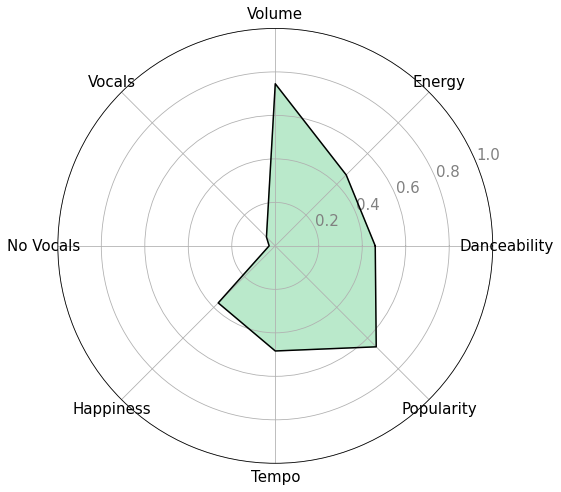

In [3]:

music_feature = data[['danceability', 'energy', 'loudness','speechiness', 'instrumentalness','valence', 'tempo', 'popularity']]

music_feature = music_feature.rename(columns={'danceability' : 'Danceability', 'energy' : 'Energy' , 'loudness' : 'Volume', 
                                        'speechiness' :'Vocals', 'acousticness' : 'Acoustic', 'instrumentalness' : 'No Vocals', 
                                        'valence' : 'Happiness', 'tempo' : 'Tempo',  'popularity' : 'Popularity'})

min_max_scaler = MinMaxScaler()
music_feature = pd.DataFrame(min_max_scaler.fit_transform(music_feature), columns=music_feature.columns)

fig=plt.figure(figsize=(12,8))

categories=list(music_feature.columns)
N=len(categories)

value=list(music_feature.mean())

value+=value[:1]

angles=[n/float(N)*2*math.pi for n in range(N)]
angles+=angles[:1]

plt.polar(angles, value, color = 'black')
plt.fill(angles,value,alpha=0.3, color='#1DB954')

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.ylim(0, 1) #added this to fix the border changing from 1

plt.show()

In [65]:
# Importing data
time = pd.read_csv('https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_six_months.csv')

time.head()

,Unnamed: 0,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,...,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,track_uri
0,22030,2023-04-18 01:56:21+00:00,sir_frankster,osx,647283,US,24.2.197.91,unknown,The One That Got Away - Acoustic,Katy Perry,...,NaN,NaN,trackdone,endplay,False,1.0,False,1.681782e+09,False,4FFSK1xgCLkTZJLUERLZKG
1,18140,2022-10-23 19:18:47+00:00,sir_frankster,ios,613026,US,166.196.106.67,unknown,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,...,NaN,NaN,fwdbtn,trackdone,True,0.0,False,1.666552e+09,False,5enxwA8aAbwZbf5qCHORXi
2,10038,2023-03-17 22:45:19+00:00,sir_frankster,ios,613026,US,107.115.20.162,unknown,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,...,NaN,NaN,trackdone,trackdone,True,0.0,False,1.679093e+09,False,5enxwA8aAbwZbf5qCHORXi
3,906,2023-01-04 02:56:30+00:00,sir_frankster,osx,613026,US,24.2.197.91,unknown,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,...,NaN,NaN,trackdone,trackdone,False,0.0,False,1.672800e+09,False,5enxwA8aAbwZbf5qCHORXi
4,9589,2023-02-23 01:13:09+00:00,sir_frankster,osx,525767,US,24.2.197.91,unknown,A Million Dreams (Instrumental Guitar),Guus Dielissen,...,NaN,NaN,trackdone,trackdone,False,0.0,False,1.677114e+09,False,0T482F5L30d7ChNbLqsKa7


In [66]:
print(time.columns)

Index(['Unnamed: 0', 'ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode', 'track_uri'],
      dtype='object')


In [67]:
# Convert msPlayed into minutes listened
time['Minutes Listened'] = time['ms_played'] / 60000

# Convert End Time (UTC) to End Time (Adj) in the user's time zone
time['End Time (Adj)'] = pd.to_datetime(time['ts'])
time.loc[time['End Time (Adj)'] < '2020-03-08', 'End Time (Adj)'] -= pd.Timedelta(hours=5)
time.loc[(time['End Time (Adj)'] >= '2020-03-08') & (time['End Time (Adj)'] < '2020-11-01'), 'End Time (Adj)'] -= pd.Timedelta(hours=4)
time.loc[time['End Time (Adj)'] >= '2020-11-01', 'End Time (Adj)'] -= pd.Timedelta(hours=5)

# Extract the day of the week from the End Time (Adj) column
time['Day of Week'] = time['End Time (Adj)'].dt.day_name()

# Calculate the total minutes listened per day of the week
total_minutes_per_day = time.groupby('Day of Week')['Minutes Listened'].sum().reset_index()

# Create a bar chart to visualize the results
fig = px.bar(total_minutes_per_day, x='Day of Week', y='Minutes Listened', title='Total Minutes Listened per Day of the Week')
fig.update_traces(hovertemplate='Day of Week: %{x}<br>Total Minutes Listened: %{y:.2f} minutes')
fig = px.bar(total_minutes_per_day, x='Day of Week', y='Minutes Listened', title='You love listening to music on the weekends',
             category_orders={'Day of Week': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']})

fig.show()


In [68]:
# Calculate the total minutes listened per day of the week
total_minutes_per_day = time.groupby('Day of Week')['Minutes Listened'].sum().reset_index()

# Find the day of the week with the highest total minutes listened
most_listened_day = total_minutes_per_day.loc[total_minutes_per_day['Minutes Listened'].idxmax(), 'Day of Week']

# Print the result
print("You listen to music the most on", most_listened_day + "s!")


You listen to music the most on Saturdays!


In [69]:
# Calculate the total listening time in milliseconds
total_ms_played = time['ms_played'].sum()

# Convert milliseconds to hours
total_hours_played = round(total_ms_played / (1000 * 60 * 60))

# Print the result
print("Total hours played:", total_hours_played)

Total hours played: 95


In [115]:
# Calculate the total listening time in milliseconds
total_ms_played = time['ms_played'].sum()

# Convert milliseconds to hours
total_min_played = round(total_ms_played / (1000 * 60))

# Print the result
print("Total minutes played:", total_min_played)

Total minutes played: 5685


In [118]:
print("In the past six months you have listened to:")
print(total_hours_played, "hours")
print(total_min_played, "minutes" )
print(most_listened_day + " is the day when you listen the most music")

In the past six months you have listened to:
95 hours
5685 minutes
Saturday is the day when you listen the most music


In [113]:
import pandas as pd
import plotly.express as px

# Filter the rows where skipped is True and group by track name
skipped_tracks = time[time['skipped'] == True].groupby('master_metadata_track_name').count()

# Sort by the number of skips in descending order and select the top 10
top_skipped_tracks = skipped_tracks.sort_values(by='skipped', ascending=True).tail(10)

# Plot the top 10 skipped tracks using a horizontal bar chart
fig = px.bar(top_skipped_tracks, x='skipped', y=top_skipped_tracks.index, orientation='h', color_discrete_sequence=["#1DB954"])
# Update the chart layout to remove the y-axis title
fig.update_layout(yaxis_title='',
                    xaxis_title = "# of Times Skipped",
                  title='LMAO You Skipped These Songs a Lot',
                  plot_bgcolor='#222222',
                  paper_bgcolor='#222222',
                  font_color='white',
                  xaxis_gridcolor='#555555'
)
fig.show()



In [112]:
track_list_ms = time.groupby(['master_metadata_track_name'],as_index=False).sum('ms_played').sort_values('ms_played',ascending = False)

#track_list_ms = pd.merge(track_list_ms, time[['master_metadata_track_name', 'master_metadata_album_artist_name','album','track_uri']].drop_duplicates(),how='inner',on=['track_uri'])

track_list_ms['minutes'] = round(track_list_ms['ms_played']/60000,1)
track_list_ms['hours'] = round(track_list_ms['minutes']/60,1)

### most played songs
top_10_tracks = track_list_ms.head(10)
top_10_tracks
#top_10_tracks[['trackName','artistName','msPlayed','minutes','hours']]

# Sort the DataFrame by the 'minutes' column in descending order
top_10_tracks = top_10_tracks.sort_values(by="minutes", ascending=True)

fig = px.bar(top_10_tracks, x="minutes", y="master_metadata_track_name", orientation="h", color_discrete_sequence=["#1DB954"])

# Set the chart title and axis labels
fig.update_layout(
    title="Wow You Really Like Emo Songs",
    xaxis_title="Minutes Played",
    yaxis_title="Song Title",
plot_bgcolor='#222222',
                  paper_bgcolor='#222222',
                  font_color='white',
                  xaxis_gridcolor='#555555'
)
fig.show()

In [119]:
artists = time.groupby(['master_metadata_album_artist_name'],as_index=False).sum('ms_played').sort_values('ms_played',ascending = False)

#track_list_ms = pd.merge(track_list_ms, time[['master_metadata_track_name', 'master_metadata_album_artist_name','album','track_uri']].drop_duplicates(),how='inner',on=['track_uri'])

artists['minutes'] = round(artists['ms_played']/60000,1)
artists['hours'] = round(artists['minutes']/60,1)

### most played songs
top_10_artists = artists.head(10)
top_10_artists
#top_10_tracks[['trackName','artistName','msPlayed','minutes','hours']]

# Sort the DataFrame by the 'minutes' column in descending order
top_10_artists = top_10_artists.sort_values(by="minutes", ascending=True)

# Create a horizontal bar chart using Plotly
fig = px.bar(top_10_artists, x="minutes", y="master_metadata_album_artist_name", orientation="h", color_discrete_sequence=["#1DB954"])

# Set the chart title and axis labels
fig.update_layout(title="Oop We Have a Swifie on Our Hands",
                  xaxis_title="Minutes Played",
                  yaxis_title="",
                  plot_bgcolor='#222222',
                  paper_bgcolor='#222222',
                  font_color='white',
                  xaxis_gridcolor='#555555'
)
fig.show()



In [80]:
genre = pd.read_csv("https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_6mo_genres.csv")
genre

,Unnamed: 0,track_uri,artist_uri,genres
0,0,4FFSK1xgCLkTZJLUERLZKG,6jJ0s89eD6GaHleKKya26X,pop
1,1,5enxwA8aAbwZbf5qCHORXi,06HL4z0CvFAxyc27GXpf02,pop
2,2,0T482F5L30d7ChNbLqsKa7,2lBxgKTiYd4kpfnAnFyI1P,acoustic guitar cover
3,3,3EZTyh1wJEmreJH1aULPCj,00FQb4jTyendYWaN8pK0wa,art pop
4,3,3EZTyh1wJEmreJH1aULPCj,00FQb4jTyendYWaN8pK0wa,pop
...,...,...,...,...
2615,834,4pbG9SUmWIvsROVLF0zF9s,3WrFJ7ztbogyGnTHbHJFl2,rock
2616,835,6h2YXTAX6QN83w0gOTjDZa,2vKiJjsgjgqIECUyYeIVvO,metalcore
2617,835,6h2YXTAX6QN83w0gOTjDZa,2vKiJjsgjgqIECUyYeIVvO,pop punk
2618,835,6h2YXTAX6QN83w0gOTjDZa,2vKiJjsgjgqIECUyYeIVvO,post-post-hardcore


In [84]:
top_genres = genre.groupby('genres').size().reset_index(name='count').sort_values('count',ascending=False)
top_genres = top_genres.loc[top_genres['genres'] != 'singer-songwriter']

top_genres.head(10)



,genres,count
189,pop,198
235,soft rock,151
147,mellow gold,131
214,rock,111
73,classic rock,79
193,pop punk,59
108,folk rock,55
238,soul,52
3,adult standards,51
168,neon pop punk,50


In [107]:
fig = px.bar(top_genres.head(10), x='genres', y='count', color_discrete_sequence=['#1DB954'])
fig.update_layout(title ="You're So Quirky for Liking Rock Music Huh",
                  xaxis_title="",
                  yaxis_title="",
                  plot_bgcolor='#222222',
                  paper_bgcolor='#222222',
                  font_color='white',
                  yaxis_gridcolor='#555555'
)
fig.show()




In [140]:
barb = pd.read_csv('https://raw.githubusercontent.com/lphan1812/spotify-project/main/AudioFeaturesTable_Barb.csv')
barb.head()

,Unnamed: 0,track_uri,popularity,danceability,energy,loudness,valence,speechiness,instrumentalness,tempo,album,trackName
0,0,1nM9BUwYIkDbLABWUHjNZH,28,0.490,0.913,-4.004,0.240,0.0468,0.000049,112.137,ATTENTION: MILEY LIVE,Like a Prayer - Live
1,6,4dFKEyGrwmIimMqwYleFOR,64,0.880,0.777,-4.465,0.880,0.2560,0.000000,132.982,Super Freaky Girl,Super Freaky Girl (with JT & BIA feat. Katie G...
2,13,65pVi11JqwSZqUuYAqLP36,56,0.718,0.890,-3.798,0.741,0.0553,0.000000,111.967,"HELLO Chapter 1: Hello, Stranger",Movie Star
3,21,45eY7Qi2PDUs8WJEhjGWdN,72,0.808,0.661,-6.237,0.804,0.0395,0.000000,107.992,Ramenez la coupe à la maison,Ramenez la coupe à la maison
4,31,0j55p8YRAPG8yajtNyjt6A,68,0.690,0.621,-3.583,0.497,0.0600,0.000028,66.858,Hold You,Hold You - Hold Yuh


In [120]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# filter the columns you're interested in
your_data = barb[['trackName', 'popularity', 'danceability', 'energy', 'loudness', 'valence', 'speechiness', 'instrumentalness', 'tempo']]
friend_data = data[['track_uri', 'popularity', 'danceability', 'energy', 'loudness', 'valence', 'speechiness', 'instrumentalness', 'tempo']]

# calculate cosine similarity matrix
X = your_data.iloc[:, 1:].values
Y = friend_data.iloc[:, 1:].values
cos_sim = cosine_similarity(X, Y)

# find most similar track
most_similar_track = np.argmax(cos_sim, axis=0)
recommendation = your_data.loc[most_similar_track]['trackName']



print(f'Recommended track: {recommendation}')


Recommended track: 177                        Don't Rush (feat. Headie One)
112                              Collide (Sped Up Remix)
87     Unlock it (Lock It) - feat. Kim Petras and Jay...
56     Do It (feat. Doja Cat, City Girls & Mulatto) [...
96                                 Do We Have A Problem?
                             ...                        
231                                         Danza Kuduro
141                                                RUN2U
255                              Mechri Na Vroume Ourano
174                                          Hallucinate
83                           Gangsta Boo (with Lil Tjay)
Name: trackName, Length: 836, dtype: object


In [138]:
linh = pd.read_csv("https://raw.githubusercontent.com/lphan1812/spotify-project/main/Linh_AudioFeaturesTableGenres.csv")

In [139]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# set up the client credentials manager
client_credentials_manager = SpotifyClientCredentials(client_id= CLIENT_ID, client_secret= CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


# function to get track name from track URI
def get_track_name(uri):
    results = sp.track(uri)
    return results['name']

# apply the function to the track_uri column and create a new column for the track name
linh['trackName'] = linh['track_uri'].apply(get_track_name)

# print the resulting dataframe
linh.head()


,Unnamed: 0,track_uri,popularity,danceability,energy,loudness,valence,acousticness,speechiness,instrumentalness,tempo,genres,artist_uri,trackName
0,0,4rPJSqrov3zqGwXlemLBMw,77,0.435,0.768,-5.352,0.378,0.0857,0.2010,0.000231,107.588,"['uk contemporary r&b', 'uk pop']",5KKpBU5eC2tJDzf0wmlRp2,Escapism. - Sped Up
1,1,69EwGs863aPS8olgCWtZ8J,41,0.632,0.349,-11.491,0.299,0.5970,0.0309,0.000000,148.009,"['v-pop', 'vietnamese singer-songwriter']",0l3YAI1xmZKCZBzduST5ft,Phiến Lá Tĩnh Lặng
2,2,2sOj9vyd6yiss9W1IK6chU,66,0.420,0.725,-4.262,0.186,0.0920,0.2230,0.000000,77.941,"['hip hop', 'miami hip hop', 'pop rap', 'rap',...",0QHgL1lAIqAw0HtD7YldmP,"GOD DID (feat. Rick Ross, Lil Wayne, Jay-Z, Jo..."
3,3,0F2gUQwJsy8iCfYv3uDgCp,0,0.600,0.326,-9.091,0.214,0.8430,0.0281,0.000000,84.996,['viet lo-fi'],15BdWDB7smcW5zPsl26u44,Cô Ấy Nói
4,4,1SGt65i9AnXYdDQt1AtDRH,67,0.773,0.595,-6.062,0.338,0.1140,0.1610,0.000002,123.968,"['hip hop', 'rap', 'slap house']",0Y5tJX1MQlPlqiwlOH1tJY,3500 (feat. Future & 2 Chainz)


In [147]:
barb_and_linh = pd.concat([barb, linh])
barb_and_linh = barb_and_linh.reset_index(drop=True)
barb_and_linh = barb_and_linh.drop(barb_and_linh.columns[0], axis=1)


barb_and_linh.head()

,track_uri,popularity,danceability,energy,loudness,valence,speechiness,instrumentalness,tempo,album,trackName,acousticness,genres,artist_uri
0,1nM9BUwYIkDbLABWUHjNZH,28,0.490,0.913,-4.004,0.240,0.0468,0.000049,112.137,ATTENTION: MILEY LIVE,Like a Prayer - Live,NaN,NaN,NaN
1,4dFKEyGrwmIimMqwYleFOR,64,0.880,0.777,-4.465,0.880,0.2560,0.000000,132.982,Super Freaky Girl,Super Freaky Girl (with JT & BIA feat. Katie G...,NaN,NaN,NaN
2,65pVi11JqwSZqUuYAqLP36,56,0.718,0.890,-3.798,0.741,0.0553,0.000000,111.967,"HELLO Chapter 1: Hello, Stranger",Movie Star,NaN,NaN,NaN
3,45eY7Qi2PDUs8WJEhjGWdN,72,0.808,0.661,-6.237,0.804,0.0395,0.000000,107.992,Ramenez la coupe à la maison,Ramenez la coupe à la maison,NaN,NaN,NaN
4,0j55p8YRAPG8yajtNyjt6A,68,0.690,0.621,-3.583,0.497,0.0600,0.000028,66.858,Hold You,Hold You - Hold Yuh,NaN,NaN,NaN


In [152]:
# define a function to get the Spotify link for a track URI
def get_spotify_link(track_uri):
    track_id = track_uri.split(':')[-1]
    track = sp.track(track_id)
    return track['external_urls']['spotify']

# apply the function to the track_uri column
barb_and_linh['spotify_link'] = barb_and_linh['track_uri'].apply(get_spotify_link)

In [153]:
barb_and_linh.head()

,track_uri,popularity,danceability,energy,loudness,valence,speechiness,instrumentalness,tempo,album,trackName,acousticness,genres,artist_uri,spotify_link
0,1nM9BUwYIkDbLABWUHjNZH,28,0.490,0.913,-4.004,0.240,0.0468,0.000049,112.137,ATTENTION: MILEY LIVE,Like a Prayer - Live,NaN,NaN,NaN,https://open.spotify.com/track/1nM9BUwYIkDbLAB...
1,4dFKEyGrwmIimMqwYleFOR,64,0.880,0.777,-4.465,0.880,0.2560,0.000000,132.982,Super Freaky Girl,Super Freaky Girl (with JT & BIA feat. Katie G...,NaN,NaN,NaN,https://open.spotify.com/track/4dFKEyGrwmIimMq...
2,65pVi11JqwSZqUuYAqLP36,56,0.718,0.890,-3.798,0.741,0.0553,0.000000,111.967,"HELLO Chapter 1: Hello, Stranger",Movie Star,NaN,NaN,NaN,https://open.spotify.com/track/65pVi11JqwSZqUu...
3,45eY7Qi2PDUs8WJEhjGWdN,72,0.808,0.661,-6.237,0.804,0.0395,0.000000,107.992,Ramenez la coupe à la maison,Ramenez la coupe à la maison,NaN,NaN,NaN,https://open.spotify.com/track/45eY7Qi2PDUs8WJ...
4,0j55p8YRAPG8yajtNyjt6A,68,0.690,0.621,-3.583,0.497,0.0600,0.000028,66.858,Hold You,Hold You - Hold Yuh,NaN,NaN,NaN,https://open.spotify.com/track/0j55p8YRAPG8yaj...


In [156]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# select the columns you want to use for similarity calculation
cols_to_use = ['popularity', 'danceability', 'energy', 'loudness', 'valence', 'speechiness', 'instrumentalness', 'tempo']

# calculate cosine similarity between your friend's data and your data
similarity_matrix = cosine_similarity(data[cols_to_use], barb_and_linh[cols_to_use])

# find the most similar tracks between your friend's data and your data
most_similar_tracks = similarity_matrix.argmax(axis=1)

# get the track names and Spotify URLs for the most similar tracks
recommendations = barb_and_linh.loc[most_similar_tracks, ['trackName', 'spotify_link']]
recommendations.reset_index(drop=True, inplace=True)

# print the top 3 recommendations
top_3_recommendations = recommendations.head(3)
top_3_recommendations.index += 1  # Start index from 1 instead of 0

# print the top 3 recommendations with their Spotify URLs
# print("Here are three song recommendations that match your taste from Barb and Linh:\n")
# print(top_3_recommendations)

top_3_recommendations.head()

,trackName,spotify_link
1,Happy Ending,https://open.spotify.com/track/1wl3u4FrzcuBv2L...
2,Collide (Sped Up Remix),https://open.spotify.com/track/2p6Fh5ruk8YUaO4...
3,Tabata Wod,https://open.spotify.com/track/02oPCMjI9z1k8c9...


In [158]:
# Find the common tracks between the two dataframes
common_tracks = set(barb_and_linh['track_uri']).intersection(data['track_uri'])

# Filter both dataframes to only include the common tracks
barb_and_linh_common = barb_and_linh[barb_and_linh['track_uri'].isin(common_tracks)]
data_common = data[data['track_uri'].isin(common_tracks)]

# Calculate the percentage of matching values for the "energy" column
energy_matches = (barb_and_linh_common.set_index('track_uri')['energy'] == data_common.set_index('track_uri')['energy']).sum()
energy_pct = 100 * energy_matches / len(common_tracks)
print(f"Energy matching percentage: {energy_pct:.2f}%")

# Calculate the percentage of matching values for the "popularity" column
popularity_matches = (barb_and_linh_common.set_index('track_uri')['popularity'] == data_common.set_index('track_uri')['popularity']).sum()
popularity_pct = 100 * popularity_matches / len(common_tracks)
print(f"Popularity matching percentage: {popularity_pct:.2f}%")


Energy matching percentage: 100.00%
Popularity matching percentage: 60.00%


In [161]:
# Reset the index of both dataframes
barb_and_linh = barb_and_linh.reset_index(drop=True)
data = data.reset_index(drop=True)

# Calculate the percentage of matching values for the "energy" column
energy_matches = (barb_and_linh['energy'] == data['energy']).sum()
energy_pct = 100 * energy_matches / len(data)

# Calculate the percentage of matching values for the "popularity" column
popularity_matches = (barb_and_linh['popularity'] == data['popularity']).sum()
popularity_pct = 100 * popularity_matches / len(data)

print(f"Energy matching percentage: {energy_pct:.2f}%")
print(f"Popularity matching percentage: {popularity_pct:.2f}%")

ValueError: Can only compare identically-labeled Series objects